In [1]:
from typing import *
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
class Process:
    """Class to represent a process."""


    def __init__(self, process_id: int, memory_required: int):
        self.process_id = process_id
        self.memory_required = memory_required


    def __repr__(self):
        return f"Process{self.process_id}(Memory={self.memory_required})"

In [15]:
class MemoryManager:
    """Class to simulate memory management with swapping."""


    def __init__(self, physical_memory_size: int, swap_area_size: int):
        self.physical_memory_size = physical_memory_size
        self.swap_area_size = swap_area_size
        self.physical_memory = [None] * physical_memory_size  # Physical memory
        self.swap_area = []  # Swap area (disk storage)
        self.processes_in_memory = {}  # Track processes in physical memory
        self.processes_in_swap = {}  # Track processes in swap area


    def load_process(self, process: Process):
        """Load a process into physical memory or swap area."""
        
        print(f"\nLoading {process}...")
        # Check if there's enough space in physical memory
        free_space = self.physical_memory.count(None)
        if free_space >= process.memory_required:
            # Allocate memory for the process
            allocated = 0
            for i in range(self.physical_memory_size):
                if self.physical_memory[i] is None:
                    self.physical_memory[i] = process.process_id
                    allocated += 1
                    if allocated == process.memory_required:
                        break
            self.processes_in_memory[process.process_id] = process
            print(f"{process} loaded into physical memory.")
        else:
            # Not enough space: Swap out a process if needed
            self.swap_process(process)


    def swap_process(self, process: Process):
        """Move a process to the swap area and load the new process."""

        if len(self.swap_area) + process.memory_required > self.swap_area_size:
            print(f"Error: Not enough space in the swap area to load {process}.")
            return

        # Find a process to swap out (FIFO approach)
        process_to_swap = next(iter(self.processes_in_memory.values()), None)
        if not process_to_swap:
            print(f"Error: No process available to swap out for {process}.")
            return

        # Swap out the selected process
        print(f"Swapping out {process_to_swap} to make room for {process}.")
        for i in range(self.physical_memory_size):
            if self.physical_memory[i] == process_to_swap.process_id:
                self.physical_memory[i] = None
        self.swap_area.append(process_to_swap)
        del self.processes_in_memory[process_to_swap.process_id]

        # Load the new process into memory
        self.load_process(process)

    
    def _allocate_to_memory(self, process: Process):
        """Helper method to allocate memory for a process."""

        allocated = 0
        for i in range(self.physical_memory_size):
            if self.physical_memory[i] is None:
                self.physical_memory[i] = process.process_id
                allocated += 1
                if allocated == process.memory_required:
                    break
        self.processes_in_memory[process.process_id] = process
        print(f"{process} loaded into physical memory.")


    def swap_in_process(self, process_id: int):
        """Move a process from the swap area back into physical memory."""

        process = next((p for p in self.swap_area if p.process_id == process_id), None)
        if not process:
            print(f"Error: Process{process_id} is not in the swap area.")
            return

        free_space = self.physical_memory.count(None)
        if free_space < process.memory_required:
            print(f"Error: Not enough space in physical memory to swap in Process{process_id}.")
            return

        print(f"Swapping in {process} from the swap area...")
        self.swap_area.remove(process)
        self._allocate_to_memory(process)


    def terminate_process(self, process_id: int):
        """Terminate a process from memory or swap."""

        print(f"\nTerminating Process{process_id}...")
        if process_id in self.processes_in_memory:
            # Remove from physical memory
            for i in range(self.physical_memory_size):
                if self.physical_memory[i] == process_id:
                    self.physical_memory[i] = None
            del self.processes_in_memory[process_id]
            print(f"Process{process_id} terminated from physical memory.")
        elif process_id in [p.process_id for p in self.swap_area]:
            # Remove from swap area
            self.swap_area = [p for p in self.swap_area if p.process_id != process_id]
            print(f"Process{process_id} terminated from the swap area.")
        else:
            print(f"Process{process_id} not found.")


    def display_memory_state(self):
        """Display the current state of memory and swap area."""

        # Display the memory state as a bar chart
        self.visualize_memory_state()

        # Display the state as a table
        self.display_memory_table()

    
    def visualize_memory_state(self):
        """Visualize the memory and swap area using bar charts."""
        
        # Plotting physical memory and swap area
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
        
        # Physical memory bar chart
        memory_colors = ['lightblue' if mem is not None else 'gray' for mem in self.physical_memory]
        ax1.bar(range(self.physical_memory_size), [1] * self.physical_memory_size, color=memory_colors, edgecolor="black")
        ax1.set_title("Physical Memory")
        ax1.set_ylabel("Memory Status")
        ax1.set_xticks(range(self.physical_memory_size))
        ax1.set_xticklabels([f"Process {mem}" if mem else "Empty" for mem in self.physical_memory])
        ax1.set_ylim(0, 1.5)

        # Swap area bar chart
        swap_colors = ['lightgreen' for _ in self.swap_area]
        ax2.bar(range(len(self.swap_area)), [1] * len(self.swap_area), color=swap_colors, edgecolor="black")
        ax2.set_title("Swap Area")
        ax2.set_ylabel("Swap Space")
        ax2.set_xticks(range(len(self.swap_area)))
        ax2.set_xticklabels([str(p) for p in self.swap_area])
        ax2.set_ylim(0, 1.5)

        plt.tight_layout()
        plt.show()


    def display_memory_table(self):
        """Display memory state in a table format."""
        
        # Data for physical memory table
        memory_data = {"Frame": [f"Frame {i}" for i in range(self.physical_memory_size)],
                       "Process": [f"Process {x}" if x else "Empty" for x in self.physical_memory]}
        
        # Data for swap area table
        swap_area_data = {"Process": [str(p) for p in self.swap_area]}
        
        # Create pandas DataFrames for displaying the memory and swap areas
        memory_df = pd.DataFrame(memory_data)
        swap_area_df = pd.DataFrame(swap_area_data)
        
        print("\nPhysical Memory Table:")
        print(memory_df)
        
        print("\nSwap Area Table:")
        print(swap_area_df)

In [16]:
# Create a memory manager with 10 units of physical memory and 20 units of swap space
memory_manager = MemoryManager(physical_memory_size=10, swap_area_size=20)

# Create processes
p1 = Process(1, 4)  # Process 1 requires 4 memory units
p2 = Process(2, 6)  # Process 2 requires 6 memory units
p3 = Process(3, 5)  # Process 3 requires 5 memory units
p4 = Process(4, 8)  # Process 4 requires 8 memory units

In [17]:
# Load processes
memory_manager.load_process(p1)
memory_manager.load_process(p2)


Loading Process1(Memory=4)...
Process1(Memory=4) loaded into physical memory.

Loading Process2(Memory=6)...
Process2(Memory=6) loaded into physical memory.


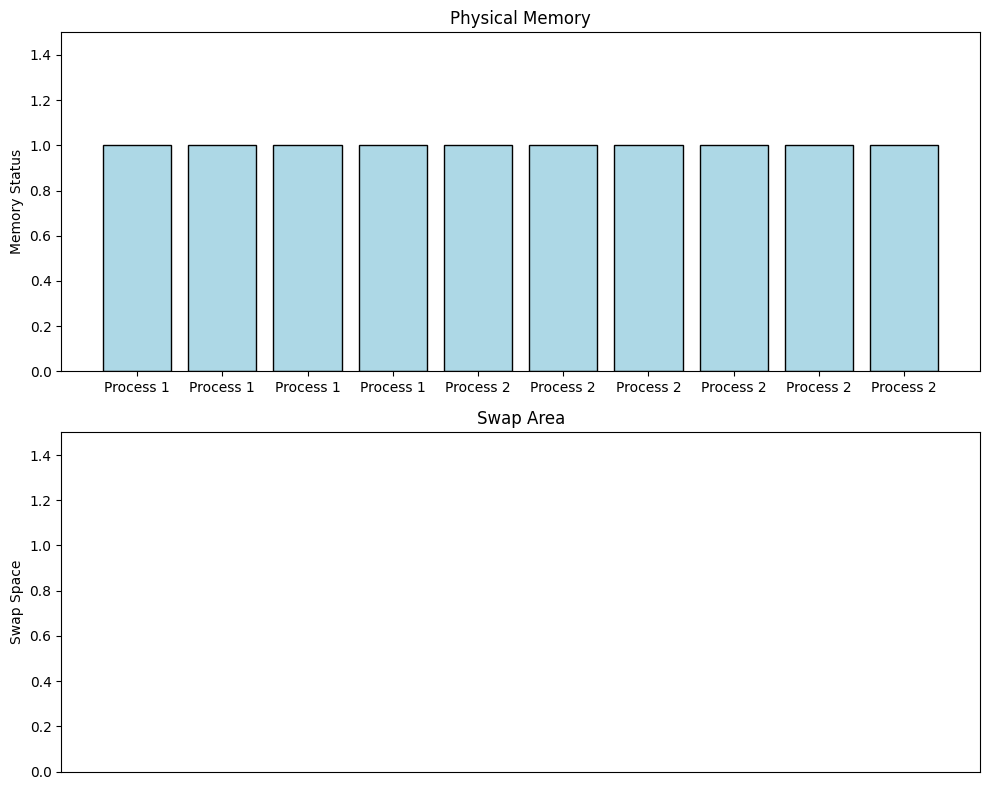


Physical Memory Table:
     Frame    Process
0  Frame 0  Process 1
1  Frame 1  Process 1
2  Frame 2  Process 1
3  Frame 3  Process 1
4  Frame 4  Process 2
5  Frame 5  Process 2
6  Frame 6  Process 2
7  Frame 7  Process 2
8  Frame 8  Process 2
9  Frame 9  Process 2

Swap Area Table:
Empty DataFrame
Columns: [Process]
Index: []


In [18]:
# Display memory state
memory_manager.display_memory_state()

In [19]:
# Load a new process that requires swapping
memory_manager.load_process(p3)


Loading Process3(Memory=5)...
Swapping out Process1(Memory=4) to make room for Process3(Memory=5).

Loading Process3(Memory=5)...
Swapping out Process2(Memory=6) to make room for Process3(Memory=5).

Loading Process3(Memory=5)...
Process3(Memory=5) loaded into physical memory.


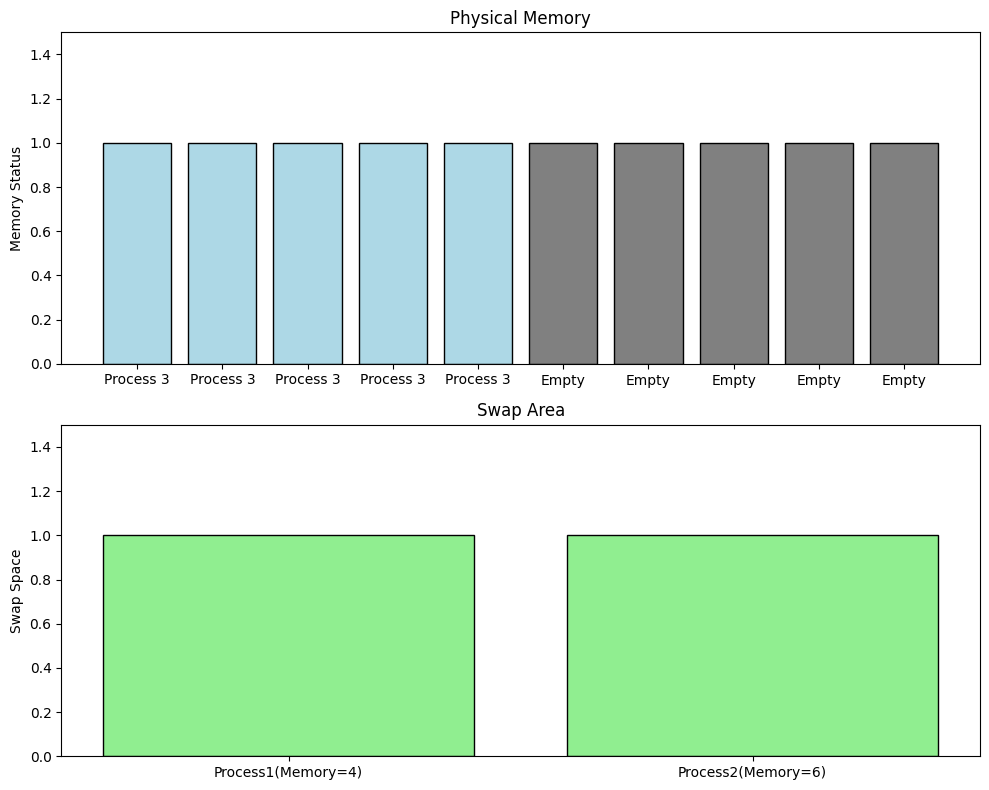


Physical Memory Table:
     Frame    Process
0  Frame 0  Process 3
1  Frame 1  Process 3
2  Frame 2  Process 3
3  Frame 3  Process 3
4  Frame 4  Process 3
5  Frame 5      Empty
6  Frame 6      Empty
7  Frame 7      Empty
8  Frame 8      Empty
9  Frame 9      Empty

Swap Area Table:
              Process
0  Process1(Memory=4)
1  Process2(Memory=6)


In [20]:
# Display memory state
memory_manager.display_memory_state()

In [21]:
# Swap a process back into physical memory
memory_manager.swap_in_process(1)

Swapping in Process1(Memory=4) from the swap area...
Process1(Memory=4) loaded into physical memory.


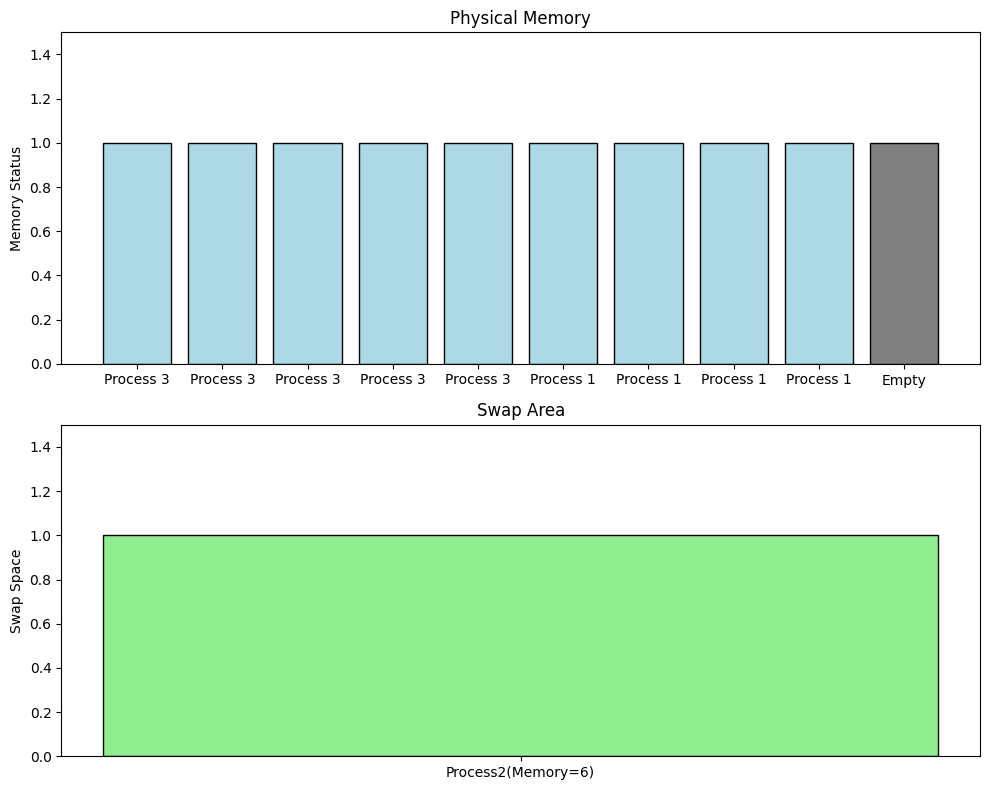


Physical Memory Table:
     Frame    Process
0  Frame 0  Process 3
1  Frame 1  Process 3
2  Frame 2  Process 3
3  Frame 3  Process 3
4  Frame 4  Process 3
5  Frame 5  Process 1
6  Frame 6  Process 1
7  Frame 7  Process 1
8  Frame 8  Process 1
9  Frame 9      Empty

Swap Area Table:
              Process
0  Process2(Memory=6)


In [22]:
# Display memory state
memory_manager.display_memory_state()

In [23]:
# Load another large process
memory_manager.load_process(p4)


Loading Process4(Memory=8)...
Swapping out Process3(Memory=5) to make room for Process4(Memory=8).

Loading Process4(Memory=8)...
Swapping out Process1(Memory=4) to make room for Process4(Memory=8).

Loading Process4(Memory=8)...
Process4(Memory=8) loaded into physical memory.


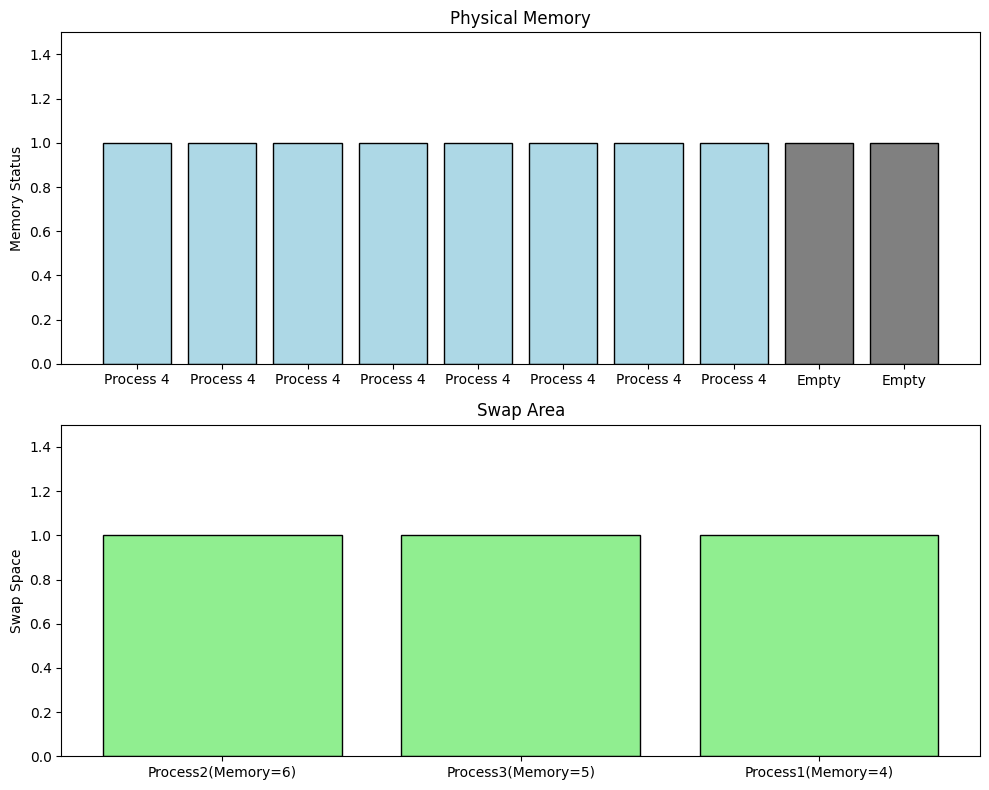


Physical Memory Table:
     Frame    Process
0  Frame 0  Process 4
1  Frame 1  Process 4
2  Frame 2  Process 4
3  Frame 3  Process 4
4  Frame 4  Process 4
5  Frame 5  Process 4
6  Frame 6  Process 4
7  Frame 7  Process 4
8  Frame 8      Empty
9  Frame 9      Empty

Swap Area Table:
              Process
0  Process2(Memory=6)
1  Process3(Memory=5)
2  Process1(Memory=4)


In [24]:
# Display memory state
memory_manager.display_memory_state()

In [25]:
# Terminate a process
memory_manager.terminate_process(2)


Terminating Process2...
Process2 terminated from the swap area.


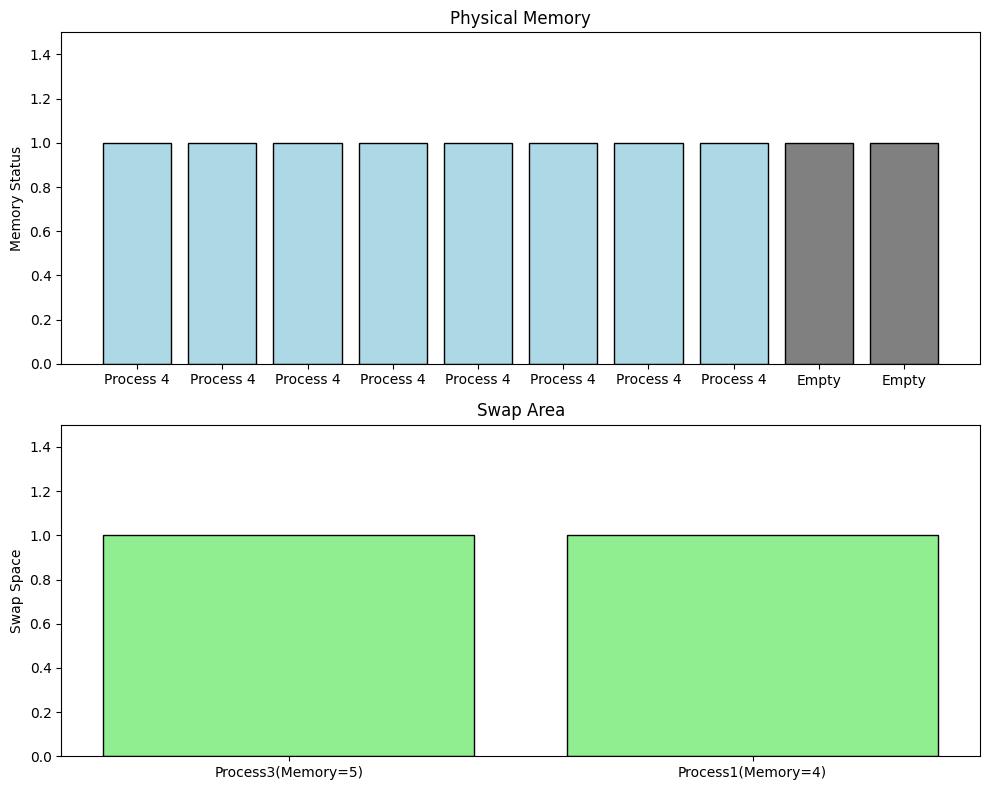


Physical Memory Table:
     Frame    Process
0  Frame 0  Process 4
1  Frame 1  Process 4
2  Frame 2  Process 4
3  Frame 3  Process 4
4  Frame 4  Process 4
5  Frame 5  Process 4
6  Frame 6  Process 4
7  Frame 7  Process 4
8  Frame 8      Empty
9  Frame 9      Empty

Swap Area Table:
              Process
0  Process3(Memory=5)
1  Process1(Memory=4)


In [26]:
# Display memory state
memory_manager.display_memory_state()